# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls

drive  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
ROOTPATH = '/content/drive/MyDrive'
DATAPATH = ROOTPATH+'/Thesis/training_set'
TRAINPATH = ROOTPATH+'/Thesis/training_set'
TESTPATH = ROOTPATH+'/Thesis/testing_set'
MODEL_PATH = ROOTPATH+'/Thesis/model'

In [ ]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [ ]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [ ]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=16

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')


Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [ ]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [ ]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=256 , kernel_size=3 , activation='relu' , input_shape=[224,224,3],padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=128 , kernel_size=3 , activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 ,  activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 ))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 ,  activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=9 , activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODEL_PATH+'CNN2.model.best.hdf5', verbose=1 ,save_best_only=True)

In [ ]:
history=cnn.fit(training_set,
                batch_size=BATCH_SIZE,
                epochs=100,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/100
270/270 [==============================] - ETA: 0s - loss: 2.1194 - accuracy: 0.1641
Epoch 1: val_loss improved from inf to 1.61014, saving model to /content/drive/MyDrive/Thesis/modelCNN2.model.best.hdf5
270/270 [==============================] - 2018s 7s/step - loss: 2.1194 - accuracy: 0.1641 - val_loss: 1.6101 - val_accuracy: 0.3870
Epoch 2/100
270/270 [==============================] - ETA: 0s - loss: 1.0391 - accuracy: 0.5995
Epoch 2: val_loss improved from 1.61014 to 0.83001, saving model to /content/drive/MyDrive/Thesis/modelCNN2.model.best.hdf5
270/270 [==============================] - 101s 372ms/step - loss: 1.0391 - accuracy: 0.5995 - val_loss: 0.8300 - val_accuracy: 0.6935
Epoch 3/100
270/270 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.8313
Epoch 3: val_loss improved from 0.83001 to 0.79118, saving model to /content/drive/MyDrive/Thesis/modelCNN2.model.best.hdf5
270/270 [==============================] - 100s 371ms/step - loss: 0.4763

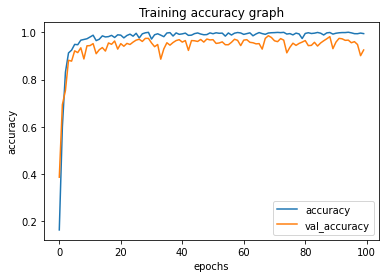

In [ ]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

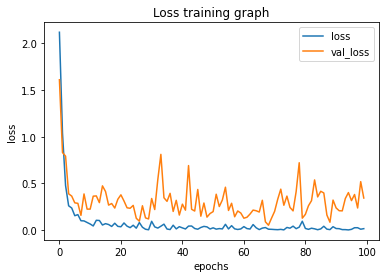

In [ ]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

36/36 [==============================] - 333s 9s/step - loss: 0.0315 - accuracy: 0.9913
Test Loss:  0.03146125003695488
Test Accuracy:  0.991304337978363


In [ ]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  99.1304337978363


In [ ]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

array([[9.9999893e-01, 9.9479678e-07, 1.7071243e-07, 4.4601381e-10,
        4.9235761e-11, 1.4395050e-10, 2.8942324e-08, 1.2167812e-09,
        9.9217445e-10],
       [9.9999988e-01, 4.1704499e-08, 1.0577570e-07, 1.1320926e-10,
        8.4106194e-12, 1.4113266e-11, 3.3149468e-09, 4.0854237e-10,
        3.3502853e-11],
       [9.9999976e-01, 2.4454692e-08, 2.1449247e-07, 9.0137349e-11,
        4.8615682e-12, 8.4282512e-12, 7.2014039e-10, 3.3576558e-10,
        9.9662570e-12],
       [9.9999952e-01, 5.3267144e-08, 4.8971032e-07, 1.8478441e-10,
        1.6787426e-11, 1.8992556e-11, 1.6704336e-09, 9.4336206e-10,
        2.3483292e-11],
       [1.0000000e+00, 1.2886687e-13, 1.9826872e-13, 1.5648795e-12,
        4.3967190e-21, 1.9072099e-15, 1.4609211e-10, 3.6898955e-17,
        7.8556202e-16]], dtype=float32)

In [ ]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0])

In [ ]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  5  0  0 55  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 72]]


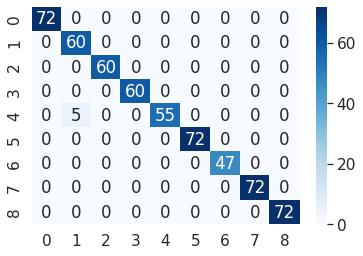

In [ ]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.991304347826087


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       0.92      1.00      0.96        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      0.92      0.96        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        72
           8       1.00      1.00      1.00        72

    accuracy                           0.99       575
   macro avg       0.99      0.99      0.99       575
weighted avg       0.99      0.99      0.99       575



In [ ]:

export_path_keras = "Final Thesis/Saved Model/Model_2_CNN.h5"
print(export_path_keras)
cnn.save(export_path_keras)

/content/drive/MyDrive/Model/Model_2_CNN.h5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:

export_path_keras = "/content/drive/MyDrive/Model/Model_2_CNN.h5"
print(export_path_keras)
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

/content/drive/MyDrive/Model/Model_2_CNN.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        73792     
                                                                 
 max_pooling

In [ ]:
print(len(reload_model.weights))
print(reload_model.output_shape)

16
(None, 9)


In [4]:
reload_model.layers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1, 224, 224, 3)
[[9.1364526e-04 3.3270176e-08 9.9900925e-01 5.1780703e-06 5.5762648e-05
  3.3658714e-07 4.5313420e-10 1.5819107e-05 5.5252419e-10]]
2


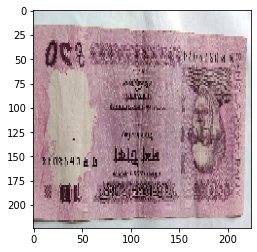

In [5]:
random_image=image.load_img('/content/drive/MyDrive/Thesis/testing_set/3.ten/ten1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=reload_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [6]:
import os
import pyttsx3 
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [8]:
export_path_keras = "Final Thesis/Saved Model/2.Model_CNN2.h5"
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [9]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
       # txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

Twenty Taka


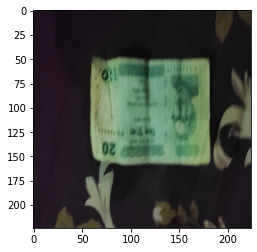

In [10]:
#""E:\AThesis\anotation\anotated img\5\new687.png"""
random_image=image.load_img('E:/AThesis/anotation/anotated img/5/new680.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))